<h3>Proyecto Red Neuronal CNN

<h3> Fidel Alejandro Navarro Salazar

En este trabajo se entrenara una red neuronal para la clasificación de fotos de perros y gatos. Para el entrenamiento del modelo se utilizará un dataset con 12500 fotos de perros y 12500 fotos de gatos.

In [1]:
#Cargamos la bibliotecas a utilizar

import numpy as np
import pandas as pd
import os

from zipfile import ZipFile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, Adam

In [2]:
#Guardamos el directorio de las imágenes
train_dr = "./train"

In [3]:
#Generamos un dataFrame con el nombre de las distintas imágenes y su categoría. 
train_names = os.listdir(train_dr)
categories = []

for filename in train_names:
    category = filename.split(".")[0]
    if category == "dog":
        categories.append("dog")
    else:
        categories.append("cat")
        
        
df = pd.DataFrame({
    "filename" : train_names,
    "category" : categories
})

In [4]:
#Observamos que tenemos dos categrías; cat y dog
df.head()

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


<function matplotlib.pyplot.show(close=None, block=None)>

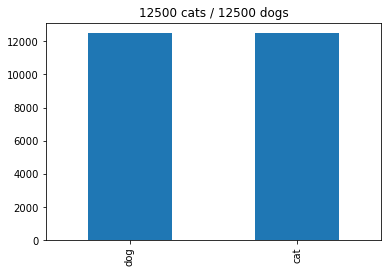

In [5]:
#Visualizamos la cantidad de imágenes a procesar
df.category.value_counts().plot.bar()
plt.title(str(len(df[df["category"]=="cat"]))+" cats"+" / "+ str(len(df[df["category"]=="dog"]))+" dogs")

#plt.ylabel(len(df))
plt.show

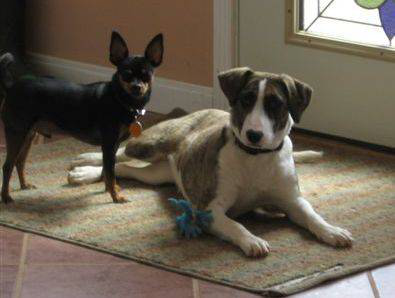

In [6]:
#Imagen aleatoria de nuestro dataset
load_img(train_dr+"/"+random.choice(df.filename))

In [7]:
#Definimos el modelo a utilizar
#Para este ejemplo usaremos 2 capas con matrices de 3x3 de convolución y matrices de 2x2 de maxpooling.
#Posteriormente se aumentará el número de capaz y las dimensiones de las matrices
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(2048, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              2

In [9]:
#Generamos las muestras de datos para entrenar y validar. 
train_df, validate_df = train_test_split(df, test_size = 0.2, random_state = 42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [10]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                  rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.5,
                                  horizontal_flip=True,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)

train_generator = train_datagen.flow_from_dataframe(train_df, 
                                                    "./train/", 
                                                    x_col='filename',
                                                    y_col='category',
                                                    target_size=(120,120),
                                                    class_mode='binary',
                                                    batch_size=64,
                                                    color_mode="rgb",
                                                    shuffle=True)

Found 20000 validated image filenames belonging to 2 classes.


In [11]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(validate_df, 
                                                    "./train/", 
                                                    x_col='filename',
                                                    y_col='category',
                                                    target_size=(120,120),
                                                    class_mode='binary',
                                                    batch_size=64,
                                                    color_mode="rgb",
                                                    shuffle=True)

Found 5000 validated image filenames belonging to 2 classes.


Observamos que 20,000 imágenes se utilizaran para el entrenamiento y 5,000 para la validación.

In [13]:
model.compile(loss="binary_crossentropy",
             metrics = ["accuracy"])

In [14]:
history = model.fit(train_generator,
                             steps_per_epoch=len(train_df)/64,
                             epochs=50,
                             validation_data=validation_generator,
                             validation_steps=len(validate_df)/64)

Epoch 1/50
312/312 [==============================] - 170s 541ms/step - loss: 1.8835 - accuracy: 0.5527 - val_loss: 0.6355 - val_accuracy: 0.6482
Epoch 2/50
312/312 [==============================] - 165s 528ms/step - loss: 0.6688 - accuracy: 0.6318 - val_loss: 0.6041 - val_accuracy: 0.6718
Epoch 3/50
312/312 [==============================] - 170s 543ms/step - loss: 0.6208 - accuracy: 0.6567 - val_loss: 0.5993 - val_accuracy: 0.6492
Epoch 4/50
312/312 [==============================] - 165s 526ms/step - loss: 0.6094 - accuracy: 0.6726 - val_loss: 0.5970 - val_accuracy: 0.6828
Epoch 5/50
312/312 [==============================] - 161s 514ms/step - loss: 0.5879 - accuracy: 0.6897 - val_loss: 0.5173 - val_accuracy: 0.7448
Epoch 6/50
312/312 [==============================] - 163s 520ms/step - loss: 0.5859 - accuracy: 0.6863 - val_loss: 0.5201 - val_accuracy: 0.7446
Epoch 7/50
312/312 [==============================] - 170s 545ms/step - loss: 0.5695 - accuracy: 0.7037 - val_loss: 0.5107 -

In [15]:
acc      = history.history["accuracy"]
val_acc  = history.history["val_accuracy"]
loss     = history.history["loss"]
val_loss = history.history["val_loss"]

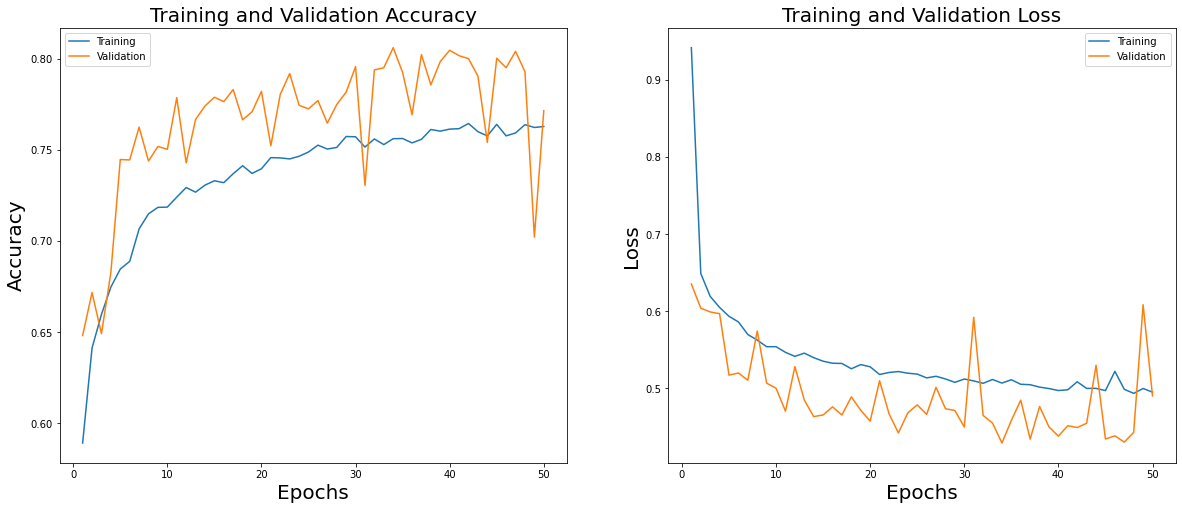

In [17]:
epochs = np.linspace(1, 50, 50)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 8)

ax1.plot(epochs, acc, label='Training')
ax1.plot(epochs, val_acc, label="Validation")
ax1.set_title("Training and Validation Accuracy", size=20)
ax1.set_ylabel("Accuracy", size=20)
ax1.set_xlabel("Epochs", size=20)

ax1.legend()

ax2.plot(epochs, loss, label='Training')
ax2.plot(epochs, val_loss, label="Validation")
ax2.set_title("Training and Validation Loss", size=20)
ax2.set_ylabel("Loss", size=20)
ax2.set_xlabel("Epochs", size=20)

ax2.legend()

plt.show()


In [18]:
model.save("model1.h5")

<h3> Variación 1: Aumento de número de capas

Se incrementará el número de capas de maxpooling y convolución a utilizar en el modelo.

In [19]:
#Definimos el modelo a utilizar
#Agregamos una capa extra
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(2048, activation="relu"),
    tf.keras.layers.Dense(2048, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 118, 118, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 59, 59, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 57, 57, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)            

In [20]:
#Generamos las muestras de datos para entrnar y validar. 
train_df, validate_df = train_test_split(df, test_size = 0.2, random_state = 42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

train_datagen = ImageDataGenerator(rotation_range=40,
                                  rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.5,
                                  horizontal_flip=True,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)

train_generator = train_datagen.flow_from_dataframe(train_df, 
                                                    "./train/", 
                                                    x_col='filename',
                                                    y_col='category',
                                                    target_size=(120,120),
                                                    class_mode='binary',
                                                    batch_size=64,
                                                    color_mode="rgb",
                                                    shuffle=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(validate_df, 
                                                    "./train/", 
                                                    x_col='filename',
                                                    y_col='category',
                                                    target_size=(120,120),
                                                    class_mode='binary',
                                                    batch_size=64,
                                                    color_mode="rgb",
                                                    shuffle=True)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [21]:
model.compile(loss="binary_crossentropy",
             metrics = ["accuracy"])

history = model.fit(train_generator,
                             steps_per_epoch=len(train_df)/64,
                             epochs=50,
                             validation_data=validation_generator,
                             validation_steps=len(validate_df)/64)

Epoch 1/50
312/312 [==============================] - 154s 491ms/step - loss: 1.0355 - accuracy: 0.5336 - val_loss: 0.6402 - val_accuracy: 0.5946
Epoch 2/50
312/312 [==============================] - 150s 481ms/step - loss: 0.6502 - accuracy: 0.6333 - val_loss: 0.5819 - val_accuracy: 0.7086
Epoch 3/50
312/312 [==============================] - 150s 481ms/step - loss: 0.6133 - accuracy: 0.6719 - val_loss: 0.5269 - val_accuracy: 0.7432
Epoch 4/50
312/312 [==============================] - 151s 482ms/step - loss: 0.5961 - accuracy: 0.6823 - val_loss: 0.5451 - val_accuracy: 0.7210
Epoch 5/50
312/312 [==============================] - 150s 481ms/step - loss: 0.5773 - accuracy: 0.7014 - val_loss: 0.5110 - val_accuracy: 0.7470
Epoch 6/50
312/312 [==============================] - 150s 480ms/step - loss: 0.5574 - accuracy: 0.7186 - val_loss: 0.4884 - val_accuracy: 0.7736
Epoch 7/50
312/312 [==============================] - 149s 477ms/step - loss: 0.5508 - accuracy: 0.7246 - val_loss: 0.4758 -

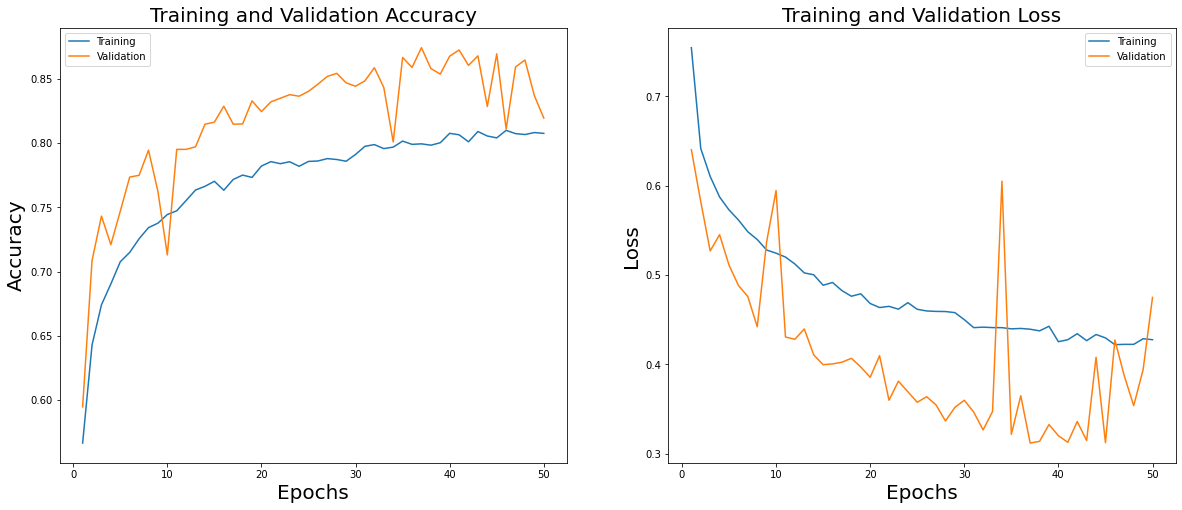

In [22]:
acc      = history.history["accuracy"]
val_acc  = history.history["val_accuracy"]
loss     = history.history["loss"]
val_loss = history.history["val_loss"]

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 8)

ax1.plot(epochs, acc, label='Training')
ax1.plot(epochs, val_acc, label="Validation")
ax1.set_title("Training and Validation Accuracy", size=20)
ax1.set_ylabel("Accuracy", size=20)
ax1.set_xlabel("Epochs", size=20)

ax1.legend()

ax2.plot(epochs, loss, label='Training')
ax2.plot(epochs, val_loss, label="Validation")
ax2.set_title("Training and Validation Loss", size=20)
ax2.set_ylabel("Loss", size=20)
ax2.set_xlabel("Epochs", size=20)

ax2.legend()

plt.show()

In [23]:
model.save("model_capas.h5")

<h3> Variación 2: Cambio de dimensiones

Se cambiará las dimensiones de las matrices de convolución y maxpooling.
Previamente se utilizó una matriz de convolución de 3x3, y una matriz de maxpooling de 2x2, ahora se implementara una matriz de 4x4 y 3x3 respectimanete.

In [24]:
#Definimos el modelo a utilizar
#Cambiamos las matrices a utilizar
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(32, (4,4), activation="relu"),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(64, (4,4), activation="relu"),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(2048, activation="relu"),
    tf.keras.layers.Dense(2048, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 117, 117, 16)      784       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 39, 39, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 36, 36, 32)        8224      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)              

In [25]:
#Generamos las muestras de datos para entrnar y validar. 
train_df, validate_df = train_test_split(df, test_size = 0.2, random_state = 42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

train_datagen = ImageDataGenerator(rotation_range=40,
                                  rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.5,
                                  horizontal_flip=True,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)

train_generator = train_datagen.flow_from_dataframe(train_df, 
                                                    "./train/", 
                                                    x_col='filename',
                                                    y_col='category',
                                                    target_size=(120,120),
                                                    class_mode='binary',
                                                    batch_size=64,
                                                    color_mode="rgb",
                                                    shuffle=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(validate_df, 
                                                    "./train/", 
                                                    x_col='filename',
                                                    y_col='category',
                                                    target_size=(120,120),
                                                    class_mode='binary',
                                                    batch_size=64,
                                                    color_mode="rgb",
                                                    shuffle=True)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [26]:
model.compile(loss="binary_crossentropy",
             metrics = ["accuracy"])

history = model.fit(train_generator,
                             steps_per_epoch=len(train_df)/64,
                             epochs=50,
                             validation_data=validation_generator,
                             validation_steps=len(validate_df)/64)

Epoch 1/50
312/312 [==============================] - 128s 408ms/step - loss: 0.7447 - accuracy: 0.5169 - val_loss: 0.6836 - val_accuracy: 0.5182
Epoch 2/50
312/312 [==============================] - 126s 404ms/step - loss: 0.6684 - accuracy: 0.6031 - val_loss: 0.6691 - val_accuracy: 0.5920
Epoch 3/50
312/312 [==============================] - 130s 414ms/step - loss: 0.6277 - accuracy: 0.6508 - val_loss: 0.5449 - val_accuracy: 0.7336
Epoch 4/50
312/312 [==============================] - 128s 410ms/step - loss: 0.6074 - accuracy: 0.6749 - val_loss: 0.5635 - val_accuracy: 0.7156
Epoch 5/50
312/312 [==============================] - 126s 404ms/step - loss: 0.5892 - accuracy: 0.6923 - val_loss: 0.5210 - val_accuracy: 0.7434
Epoch 6/50
312/312 [==============================] - 126s 404ms/step - loss: 0.5737 - accuracy: 0.7048 - val_loss: 0.5358 - val_accuracy: 0.7258
Epoch 7/50
312/312 [==============================] - 127s 405ms/step - loss: 0.5590 - accuracy: 0.7145 - val_loss: 0.4785 -

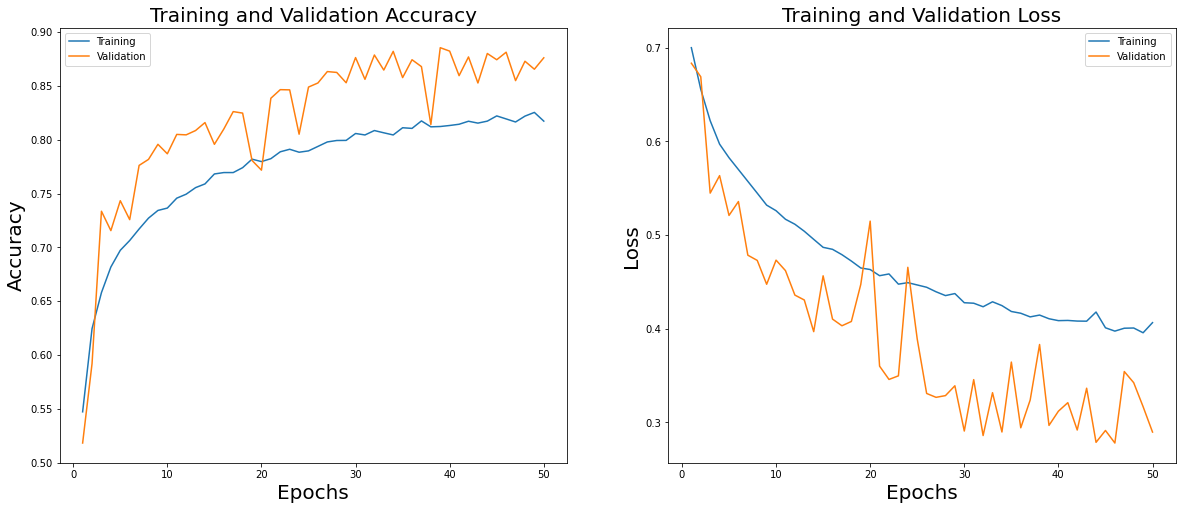

In [27]:
acc      = history.history["accuracy"]
val_acc  = history.history["val_accuracy"]
loss     = history.history["loss"]
val_loss = history.history["val_loss"]

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 8)

ax1.plot(epochs, acc, label='Training')
ax1.plot(epochs, val_acc, label="Validation")
ax1.set_title("Training and Validation Accuracy", size=20)
ax1.set_ylabel("Accuracy", size=20)
ax1.set_xlabel("Epochs", size=20)

ax1.legend()

ax2.plot(epochs, loss, label='Training')
ax2.plot(epochs, val_loss, label="Validation")
ax2.set_title("Training and Validation Loss", size=20)
ax2.set_ylabel("Loss", size=20)
ax2.set_xlabel("Epochs", size=20)

ax2.legend()

plt.show()

In [28]:
model.save("model_dim.h5")

<h3> Variación 3: Optimizer

Se utilizarán dos optimizadores: Adam y RMSprop.

In [29]:
#Definimos el modelo a utilizar

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(32, (4,4), activation="relu"),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(64, (4,4), activation="relu"),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(2048, activation="relu"),
    tf.keras.layers.Dense(2048, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

Optimizer: RMSprop

In [30]:
#Agregamos el Optimizer RMSprop con un learning rate de lr=0.001
model.compile(optimizer=RMSprop(lr=0.001),
            loss="binary_crossentropy",
             metrics = ["accuracy"])

history = model.fit(train_generator,
                             steps_per_epoch=len(train_df)/64,
                             epochs=50,
                             validation_data=validation_generator,
                             validation_steps=len(validate_df)/64)

Epoch 1/50
312/312 [==============================] - 127s 404ms/step - loss: 0.7257 - accuracy: 0.5365 - val_loss: 0.6238 - val_accuracy: 0.6848
Epoch 2/50
312/312 [==============================] - 126s 402ms/step - loss: 0.6422 - accuracy: 0.6366 - val_loss: 0.5435 - val_accuracy: 0.7288
Epoch 3/50
312/312 [==============================] - 126s 402ms/step - loss: 0.6082 - accuracy: 0.6710 - val_loss: 0.5000 - val_accuracy: 0.7546
Epoch 4/50
312/312 [==============================] - 126s 403ms/step - loss: 0.5870 - accuracy: 0.6960 - val_loss: 0.6021 - val_accuracy: 0.6660
Epoch 5/50
312/312 [==============================] - 128s 409ms/step - loss: 0.5745 - accuracy: 0.7014 - val_loss: 0.7136 - val_accuracy: 0.6722
Epoch 6/50
312/312 [==============================] - 126s 402ms/step - loss: 0.5708 - accuracy: 0.7149 - val_loss: 0.4583 - val_accuracy: 0.7862
Epoch 7/50
312/312 [==============================] - 126s 402ms/step - loss: 0.5339 - accuracy: 0.7347 - val_loss: 0.4394 -

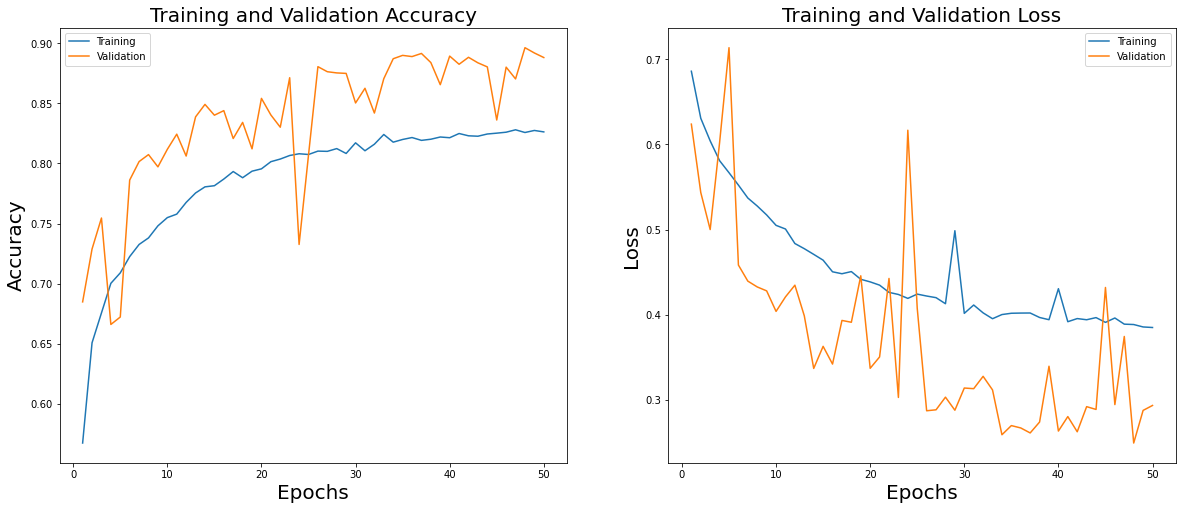

In [31]:
acc      = history.history["accuracy"]
val_acc  = history.history["val_accuracy"]
loss     = history.history["loss"]
val_loss = history.history["val_loss"]

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 8)

ax1.plot(epochs, acc, label='Training')
ax1.plot(epochs, val_acc, label="Validation")
ax1.set_title("Training and Validation Accuracy", size=20)
ax1.set_ylabel("Accuracy", size=20)
ax1.set_xlabel("Epochs", size=20)

ax1.legend()

ax2.plot(epochs, loss, label='Training')
ax2.plot(epochs, val_loss, label="Validation")
ax2.set_title("Training and Validation Loss", size=20)
ax2.set_ylabel("Loss", size=20)
ax2.set_xlabel("Epochs", size=20)

ax2.legend()

plt.show()

In [32]:
model.save("model_RMSprop.h5")

Optimizer: Adam

In [35]:
#Agregamos el Optimizer Adma con un learning rate de lr=0.001
model.compile(optimizer=Adam(lr=0.001),
            loss="binary_crossentropy",
             metrics = ["accuracy"])

history = model.fit(train_generator,
                             steps_per_epoch=len(train_df)/64,
                             epochs=50,
                             validation_data=validation_generator,
                             validation_steps=len(validate_df)/64)

Epoch 1/50
312/312 [==============================] - 122s 387ms/step - loss: 0.3584 - accuracy: 0.8383 - val_loss: 0.2723 - val_accuracy: 0.8860
Epoch 2/50
312/312 [==============================] - 122s 389ms/step - loss: 0.3503 - accuracy: 0.8446 - val_loss: 0.2389 - val_accuracy: 0.8972
Epoch 3/50
312/312 [==============================] - 122s 389ms/step - loss: 0.3336 - accuracy: 0.8465 - val_loss: 0.2505 - val_accuracy: 0.8974
Epoch 4/50
312/312 [==============================] - 121s 388ms/step - loss: 0.5434 - accuracy: 0.7237 - val_loss: 0.3310 - val_accuracy: 0.8576
Epoch 5/50
312/312 [==============================] - 122s 389ms/step - loss: 0.3691 - accuracy: 0.8349 - val_loss: 0.2390 - val_accuracy: 0.8972
Epoch 6/50
312/312 [==============================] - 121s 389ms/step - loss: 0.3338 - accuracy: 0.8482 - val_loss: 0.2680 - val_accuracy: 0.8936
Epoch 7/50
312/312 [==============================] - 122s 389ms/step - loss: 0.3249 - accuracy: 0.8553 - val_loss: 0.2230 -

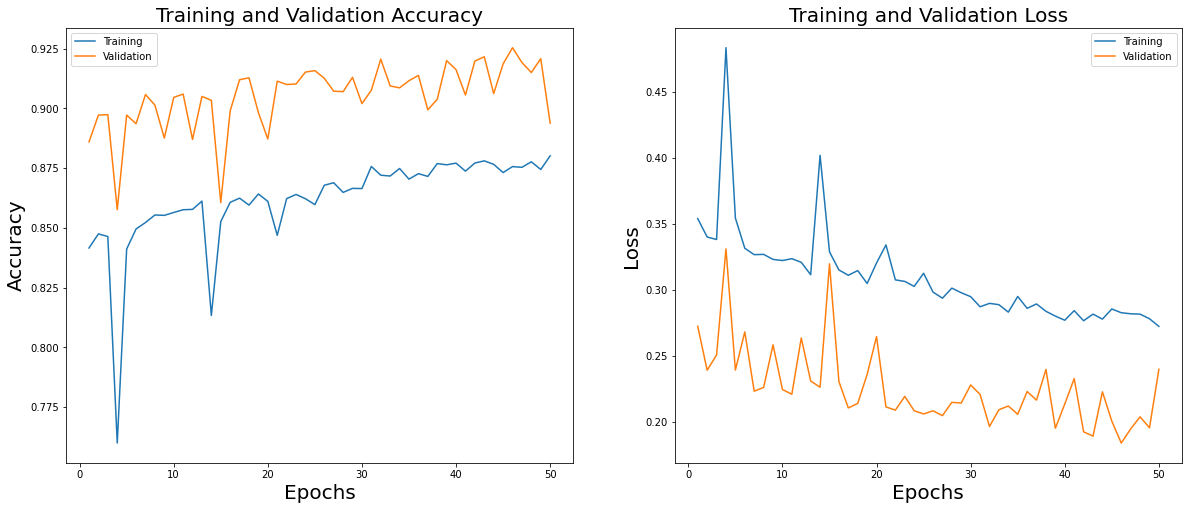

In [36]:
acc      = history.history["accuracy"]
val_acc  = history.history["val_accuracy"]
loss     = history.history["loss"]
val_loss = history.history["val_loss"]

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 8)

ax1.plot(epochs, acc, label='Training')
ax1.plot(epochs, val_acc, label="Validation")
ax1.set_title("Training and Validation Accuracy", size=20)
ax1.set_ylabel("Accuracy", size=20)
ax1.set_xlabel("Epochs", size=20)

ax1.legend()

ax2.plot(epochs, loss, label='Training')
ax2.plot(epochs, val_loss, label="Validation")
ax2.set_title("Training and Validation Loss", size=20)
ax2.set_ylabel("Loss", size=20)
ax2.set_xlabel("Epochs", size=20)

ax2.legend()

plt.show()

In [37]:
model.save("model_Adam.h5")

<h3>Variación 4: Batch Size

En esta variación cambiaremos el batch_size de 64 a 32.

In [38]:
#Generamos las muestras de datos para entrnar y validar. 
train_df, validate_df = train_test_split(df, test_size = 0.2, random_state = 42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

train_datagen = ImageDataGenerator(rotation_range=40,
                                  rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.5,
                                  horizontal_flip=True,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)
#Cambiamos el batch_size a 32
train_generator = train_datagen.flow_from_dataframe(train_df, 
                                                    "./train/", 
                                                    x_col='filename',
                                                    y_col='category',
                                                    target_size=(120,120),
                                                    class_mode='binary',
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    shuffle=True)

Found 20000 validated image filenames belonging to 2 classes.


In [39]:
validation_datagen = ImageDataGenerator(rescale=1./255)
#Cambiamos el batch_size a 32
validation_generator = validation_datagen.flow_from_dataframe(validate_df, 
                                                    "./train/", 
                                                    x_col='filename',
                                                    y_col='category',
                                                    target_size=(120,120),
                                                    class_mode='binary',
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    shuffle=True)

Found 5000 validated image filenames belonging to 2 classes.


In [40]:
#Definimos el modelo a utilizar

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(32, (4,4), activation="relu"),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(64, (4,4), activation="relu"),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(2048, activation="relu"),
    tf.keras.layers.Dense(2048, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 117, 117, 16)      784       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 39, 39, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 36, 36, 32)        8224      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)              

In [41]:
model.compile(optimizer=Adam(lr=0.001),
            loss="binary_crossentropy",
             metrics = ["accuracy"])

history = model.fit(train_generator,
                             steps_per_epoch=len(train_df)/32,
                             epochs=50,
                             validation_data=validation_generator,
                             validation_steps=len(validate_df)/32)

Epoch 1/50
625/625 [==============================] - 137s 218ms/step - loss: 0.6950 - accuracy: 0.5074 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 2/50
625/625 [==============================] - 128s 205ms/step - loss: 0.6933 - accuracy: 0.4972 - val_loss: 0.6869 - val_accuracy: 0.5382
Epoch 3/50
625/625 [==============================] - 130s 208ms/step - loss: 0.6868 - accuracy: 0.5507 - val_loss: 0.6850 - val_accuracy: 0.5584
Epoch 4/50
625/625 [==============================] - 132s 211ms/step - loss: 0.6796 - accuracy: 0.5732 - val_loss: 0.6620 - val_accuracy: 0.6248
Epoch 5/50
625/625 [==============================] - 133s 212ms/step - loss: 0.6689 - accuracy: 0.5878 - val_loss: 0.6244 - val_accuracy: 0.6506
Epoch 6/50
625/625 [==============================] - 132s 212ms/step - loss: 0.6337 - accuracy: 0.6366 - val_loss: 0.5904 - val_accuracy: 0.6904
Epoch 7/50
625/625 [==============================] - 132s 211ms/step - loss: 0.6116 - accuracy: 0.6596 - val_loss: 0.5555 -

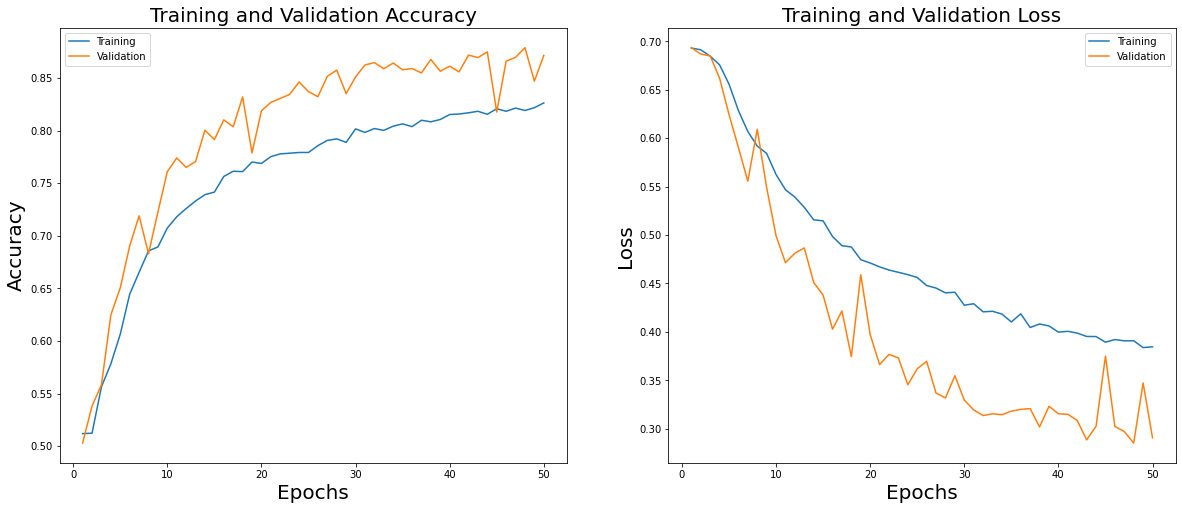

In [42]:
acc      = history.history["accuracy"]
val_acc  = history.history["val_accuracy"]
loss     = history.history["loss"]
val_loss = history.history["val_loss"]

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 8)

ax1.plot(epochs, acc, label='Training')
ax1.plot(epochs, val_acc, label="Validation")
ax1.set_title("Training and Validation Accuracy", size=20)
ax1.set_ylabel("Accuracy", size=20)
ax1.set_xlabel("Epochs", size=20)

ax1.legend()

ax2.plot(epochs, loss, label='Training')
ax2.plot(epochs, val_loss, label="Validation")
ax2.set_title("Training and Validation Loss", size=20)
ax2.set_ylabel("Loss", size=20)
ax2.set_xlabel("Epochs", size=20)

ax2.legend()

plt.show()

In [43]:
model.save("model_batchsize.h5")

Por último probaremos nuestro modelo con fotos propias de gatos y perros.

                                       filename
0                           20201204_122755.jpg
1                           20210216_122214.jpg
2                                     dog.1.jpg
3  WhatsApp Image 2021-04-20 at 2.40.27 PM.jpeg
Found 4 validated image filenames.
[0.03137827 0.9009443  0.96059227 0.9052206 ]


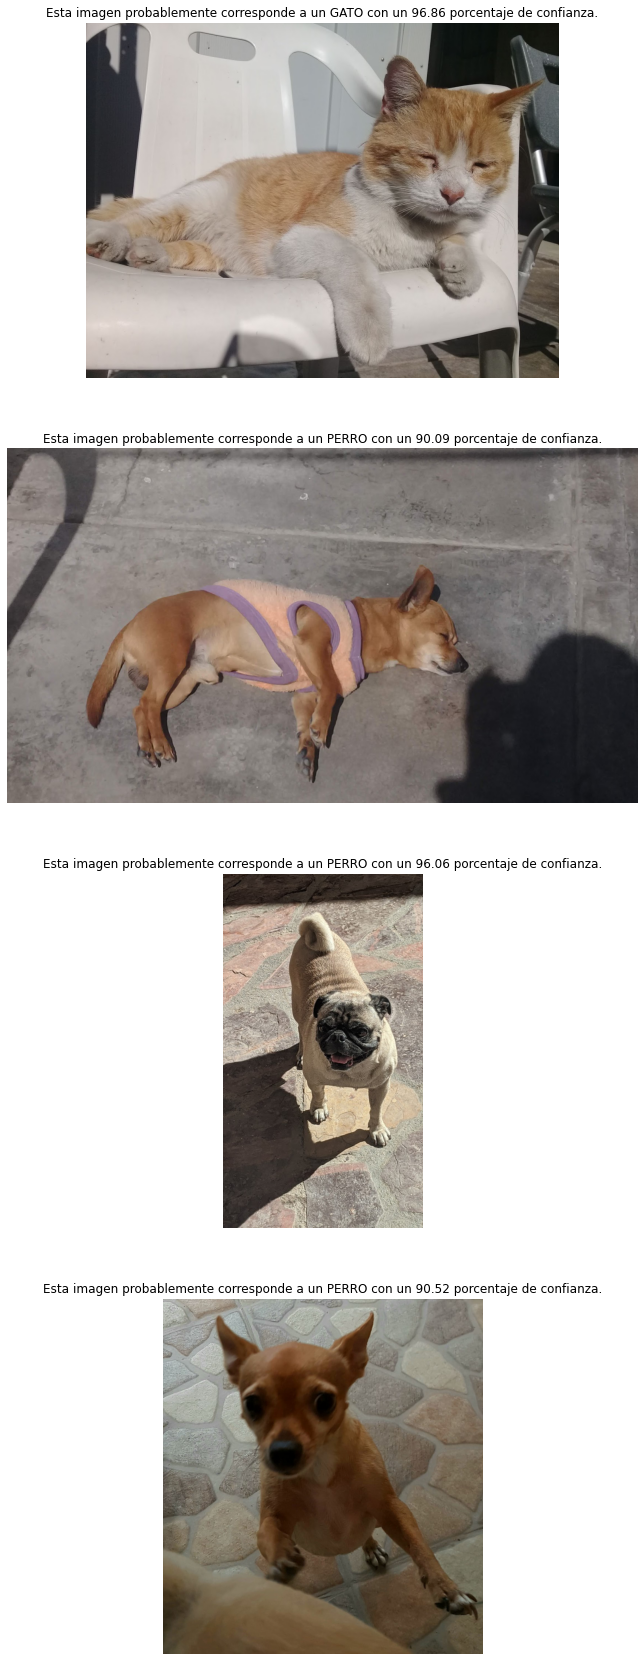

In [2]:
model = tf.keras.models.load_model("model_batchsize.h5")

test_dr = "./fotos"

test_names = os.listdir(test_dr)     
test_df = pd.DataFrame({
    "filename" : test_names#,
})

nb_samples = test_df.shape[0]

print(test_df)

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_dataframe(
    test_df, 
    "./fotos/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(120, 120),
    batch_size=32,
    shuffle=False
)

predict = model.predict(test_set, steps=np.ceil(nb_samples/32))

y = predict.reshape(-1)
print(y)

from PIL import Image
fig = plt.figure(figsize=(30,30))

for i in range(len(test_df)):
    if round(y[i])==0:
        class_name = "GATO"
        score = 1. - y[i]
    elif round(y[i])==1:
        class_name = "PERRO"
        score = y[i]
    title = (
        'Esta imagen probablemente corresponde a un {} con un {:.2f} porcentaje de confianza.'
        .format(class_name, 100 * score)
    )
    fig.add_subplot(len(test_df),1,i+1)
    plt.imshow(Image.open(test_dr+"/"+test_names[i]))
    plt.axis('off')
    plt.title(title)